# Credit Card Clustering

## Introduction
#### In this note, we will perform clustering on a credit card dataset to identify customer segments. The dataset source can be found here. We will use Python and various libraries such as pandas, numpy, scikit-learn, matplotlib, plotly, and yellowbrick for data processing, analysis, and visualization.

In [147]:
# https://statso.io/customer-segmentation-case-study/ Data source

## Import Libraries


In [148]:
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
import plotly.graph_objects as go

## Load Data


In [149]:
df = pd.read_csv("Credit card data/CC GENERAL.csv")
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

## Data Overview


In [150]:
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization


#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  8950
nNumber of features: 18
nData Features:
['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
nMissing values: 314
nUnique values:
CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                     

## Data Preprocessing


In [151]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [152]:
df = df.dropna()

## EDA

In [153]:
corr = df.corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_20344\3162853221.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Feature Selection

In [154]:
clustering_data = df[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]
print(clustering_data.head())

       BALANCE  PURCHASES  CREDIT_LIMIT
0    40.900749      95.40        1000.0
1  3202.467416       0.00        7000.0
2  2495.148862     773.17        7500.0
4   817.714335      16.00        1200.0
5  1809.828751    1333.28        1800.0


## Data Scaling


In [155]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(clustering_data), columns=clustering_data.columns)
data_ = data.copy()

In [156]:
print(data.head())

    BALANCE  PURCHASES  CREDIT_LIMIT
0  0.002148   0.001945      0.031720
1  0.168169   0.000000      0.232053
2  0.131026   0.015766      0.248748
3  0.042940   0.000326      0.038397
4  0.095038   0.027188      0.058431


## Determine Optimal Number of Clusters


#### 

c:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_i

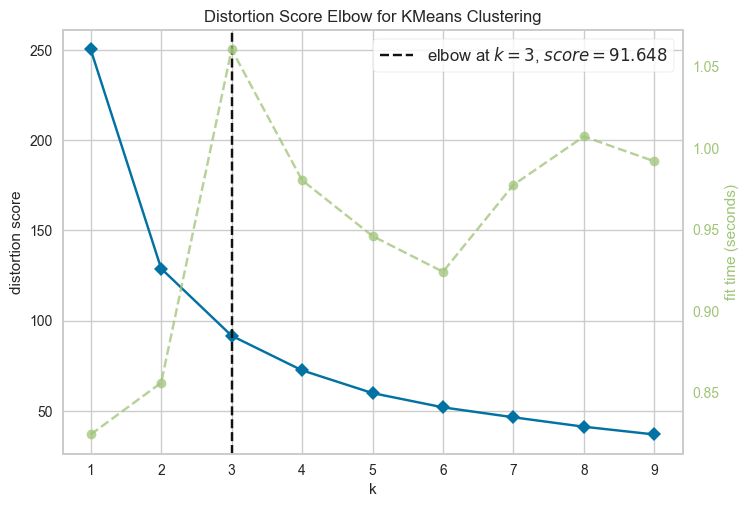

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [157]:
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(data)
visualizer.show()

## Hierarchical Clustering Dendrogram


In [170]:
Z = linkage(data_, 'ward')   
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.axhline(y=8, color='r', linestyle='-')


fig.axhline(y=8, color='r', linestyle='-')


## K-Means Clustering


In [159]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(clustering_data)
data["CREDIT_CARD_SEGMENTS"] = clusters
data["CREDIT_CARD_SEGMENTS"] = data["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1: 
    "Cluster 2", 2: "Cluster 3"})

c:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Visualization - 3D Scatter Plot


In [160]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["CREDIT_CARD_SEGMENTS"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data["CREDIT_CARD_SEGMENTS"]== i]['BALANCE'],
                                y = data[data["CREDIT_CARD_SEGMENTS"] == i]['PURCHASES'],
                                z = data[data["CREDIT_CARD_SEGMENTS"] == i]['CREDIT_LIMIT'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [161]:
data.drop(['CREDIT_CARD_SEGMENTS'], inplace=True,axis=1)

## Agglomerative Clustering

In [162]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
pred = cluster.fit_predict(data)
data["CREDIT_CARD_SEGMENTS"] = pred
data["CREDIT_CARD_SEGMENTS"] = data["CREDIT_CARD_SEGMENTS"].map({0: "Cluster 1", 1: 
    "Cluster 2", 2: "Cluster 3"})

c:\Users\ankit\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [163]:
print(data["CREDIT_CARD_SEGMENTS"].head(20))

0     Cluster 2
1     Cluster 1
2     Cluster 1
3     Cluster 2
4     Cluster 2
5     Cluster 1
6     Cluster 2
7     Cluster 1
8     Cluster 1
9     Cluster 2
10    Cluster 2
11    Cluster 2
12    Cluster 1
13    Cluster 2
14    Cluster 3
15    Cluster 2
16    Cluster 2
17    Cluster 1
18    Cluster 1
19    Cluster 2
Name: CREDIT_CARD_SEGMENTS, dtype: object


## Data Visualization


In [164]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["CREDIT_CARD_SEGMENTS"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data["CREDIT_CARD_SEGMENTS"]== i]['BALANCE'],
                                y = data[data["CREDIT_CARD_SEGMENTS"] == i]['PURCHASES'],
                                z = data[data["CREDIT_CARD_SEGMENTS"] == i]['CREDIT_LIMIT'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## Conclusion
#### In conclusion, this project focused on credit card data clustering and segmentation. The dataset used for the analysis contained information about customers' credit card usage, including balances, purchases, and credit limits.

#### The project began with an overview of the dataset, including the number of rows and features, as well as the presence of missing values. The missing values were dropped from the dataset to ensure data integrity.

#### Next, the data was preprocessed by scaling the numerical features using a MinMaxScaler. This step was important to bring all the features to a similar scale and avoid biases in the clustering process.

#### The optimal number of clusters was determined using the elbow method and visualized using the KElbowVisualizer. The analysis indicated that three clusters were appropriate for the dataset.

#### Two clustering algorithms, K-means and Agglomerative Clustering, were applied to the preprocessed data. The resulting clusters were assigned labels and visualized in a 3D scatter plot, showing the distribution of customers based on their balance, purchases, and credit limits.

#### Overall, this project demonstrated the application of clustering techniques to credit card data for customer segmentation. The identified clusters can be used for targeted marketing campaigns, personalized offers, and improved customer service based on the distinct characteristics of each segment.